<a href="https://colab.research.google.com/github/Piyaphum/Python-Mini-Projects/blob/main/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.datasets import fetch_datasets
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.metrics import accuracy_score, precision_score, recall_score, balanced_accuracy_score, f1_score, roc_auc_score

import matplotlib.pyplot as plt

[(-1, 4715), (1, 183)]


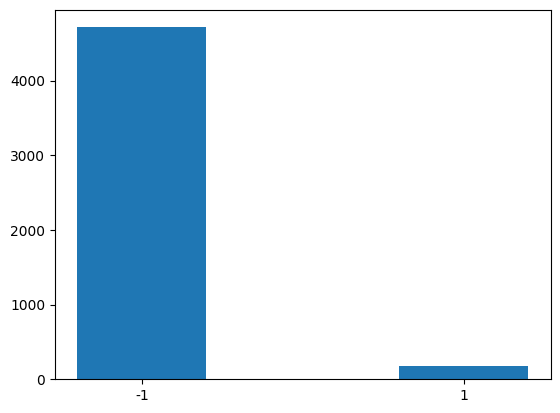

Training target : Counter({-1: 3529, 1: 144})
Test target : Counter({-1: 1186, 1: 39})
accuracy score : 0.8759183673469387


In [ ]:
RANDOM_STATE = 42

dataset = fetch_datasets()['wine_quality']
print(sorted((Counter(dataset.target).items())))
X = dataset.data
y = dataset.target
lists = Counter(dataset.target)
plt.xticks([-1,1], ['-1','1'])
plt.bar(lists.keys(),lists.values())

plt.show()



X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=RANDOM_STATE)
print(f"Training target : {Counter(y_train)}")
print(f"Test target : {Counter(y_test)}")

over_model = make_pipeline(
    StandardScaler(),
    SMOTE(random_state = RANDOM_STATE),
    SVC(random_state=RANDOM_STATE) )

over_model.fit(X_train,y_train)
y_predicted = over_model.predict(X_test)

print('accuracy score :', accuracy_score(y_test,y_predicted))

In [ ]:
print('Precision Score : ', precision_score(y_test, y_predicted))
print("Recall Score : ", recall_score(y_test, y_predicted))
print("F1-Score : ", f1_score(y_test, y_predicted))
print("ROC AUC Score : ", roc_auc_score(y_test, y_predicted))
print("Balanced Accuracy : ", balanced_accuracy_score(y_test, y_predicted))

Precision Score :  0.14012738853503184
Recall Score :  0.5641025641025641
F1-Score :  0.22448979591836737
ROC AUC Score :  0.7251372854239634
Balanced Accuracy :  0.7251372854239633


In [ ]:
under_model = make_pipeline(
    StandardScaler(),
    NearMiss(),
    SVC(random_state=RANDOM_STATE) )

under_model.fit(X_train,y_train)
y_predicted = under_model.predict(X_test)

Precision Score :  0.05400696864111498
Recall Score :  0.7948717948717948
F1-Score :  0.10114192495921696
ROC AUC Score :  0.6685151554460154
Balanced Accuracy :  0.6685151554460155
accuracy score : 0.5502040816326531


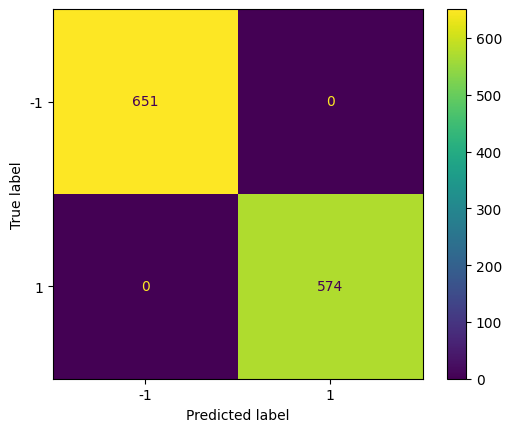

In [ ]:
print('Precision Score : ', precision_score(y_test, y_predicted))
print("Recall Score : ", recall_score(y_test, y_predicted))
print("F1-Score : ", f1_score(y_test, y_predicted))
print("ROC AUC Score : ", roc_auc_score(y_test, y_predicted))
print("Balanced Accuracy : ", balanced_accuracy_score(y_test, y_predicted))
print(ConfusionMatrixDisplay.from_estimator(under_model, X_test, y_predicted))
print('accuracy score :', accuracy_score(y_test,y_predicted))

In [ ]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
url= 'https://drive.google.com/uc?id=17Vs8R2ddwu4yO-FuPdBrpbxDMXaGQZhW'
df = pd.read_csv(url)
print(df)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [ ]:
X = df['total_bill']
y = df['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

polynomial_factor = np.polyfit(X_train, y_train, 1) #polyfit = ทำให้พอดี
polyfunc = np.poly1d(polynomial_factor) #1d = 1 Dimension

print(polynomial_factor)
print(polyfunc)

[0.10924619 0.84680066]
 
0.1092 x + 0.8468


<function matplotlib.pyplot.show(close=None, block=None)>

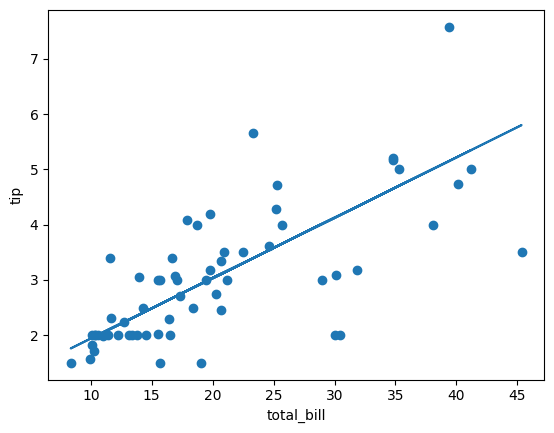

In [ ]:
y_fit = np.polyval(polynomial_factor, X_test)

plt.scatter(X_test, y_test)
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.plot(X_test, y_fit)
plt.show

In [ ]:
print('r square : ', r2_score(y_test, y_fit))
print('mean absolute error : ', mean_absolute_error(y_test, y_fit))
print('mean square error : ', mean_squared_error(y_test, y_fit))

r square :  0.4854342159539491
mean absolute error :  0.6131277769164835
mean square error :  0.7563531518481611
